# Rock - Paper - Scissors Game

## Author: Christos Psychalas (cpsyc@csd.auth.gr)
## Thanks to: Julien de la Bruère-Terreault (drgfreeman@tuta.io)

### GitHub: https://github.com/Xritsos/rock-paper-scissors.git

## 1. Data Preparation

### The data are split for each case (paper, rock, scissors) into three subfolders: train (400 samples/case) - validation (100 samples/case) - test (112 samples/case). We take the initial images and transform them into greyscale images of size 64x64

In [ ]:
import glob
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image, ImageOps

In [ ]:
def transform_images(path):
  '''This function takes a path to the images and transforms them
  into greyscale images of size 64x64 saving them overwritting the existing ones.
  '''

  for img_path in glob.glob(f'{path}*'):
    img = Image.open(img_path)
    img = ImageOps.grayscale(img)
    img = img.resize((64, 64))
    img.save(img_path)

In [ ]:
# set path list for all images
base_path = './drive/MyDrive/images'
paths = [f'{base_path}/paper/train/',
         f'{base_path}/paper/test/',
         f'{base_path}/paper/validation/',
         f'{base_path}/rock/train/',
         f'{base_path}/rock/test/',
         f'{base_path}/rock/validation/',
         f'{base_path}/scissors/train/',
         f'{base_path}/scissors/test/',
         f'{base_path}/scissors/validation/']

In [ ]:
# transform images
for p in paths:
  transform_images(p)

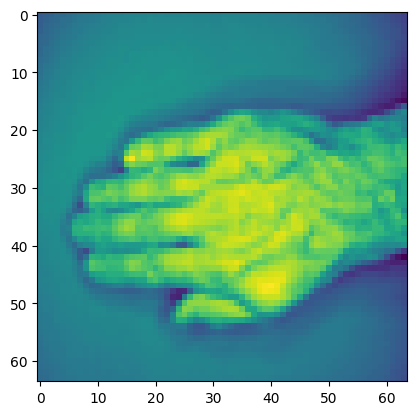

In [ ]:
# open a random image to see the results
new_path = './drive/MyDrive/images/paper/test/TYjJigXjEyiVntzx.png'

image = Image.open(new_path)
plt.imshow(image)

## 2. Model Architecture

### The model chosen for competing with the random agent is a convolutional neural network as it is the standard for image classification/segmentation tasks outperforming the classic ML algorithms. The implementation would be a small CNN, as the task at hand is quite simple. Along with the main layers we add some random flips and rotations in order to make it more robust.

In [ ]:
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D
import tensorflow as tf

In [ ]:
def make_model():
    model = Sequential()

    # input layer
    model.add(keras.Input(shape=(64, 64, 1)))

    # transformation layers
    model.add(layers.RandomFlip('horizontal'))

    model.add(layers.RandomFlip('vertical'))

    model.add(layers.RandomRotation(factor=(-0.125, 0.125)))

    # convolutions
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='valid'))

    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='valid'))

    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='valid'))

    model.add(layers.MaxPooling2D((2, 2)))

    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='valid'))

    model.add(layers.MaxPooling2D((2, 2)))

    # flatten for dense layer input
    model.add(layers.Flatten())

    # apply regularization by dropping some neurons
    model.add(layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(units=512, activation='relu'))

    # Output layer
    model.add(tf.keras.layers.Dense(units=3, activation='softmax'))

    return model

## 3. Load Data for training

### In this part we load the greyscale images created at the start and apply a gaussian (white noise). We save them to numpy arrays in order to feed them in the model. The labels for the train and validation sets are created. After that we apply a scalling to our data, using the MinMaxScaler with 0 mean, as our data now may become negative due to the gaussian noise.

In [ ]:
paper_train = f'{base_path}/paper/train/*'
paper_val = f'{base_path}/paper/validation/*'
rock_train = f'{base_path}/rock/train/*'
rock_val = f'{base_path}/rock/validation/*'
scissors_train = f'{base_path}/scissors/train/*'
scissors_val = f'{base_path}/scissors/validation/*'

x_paper_train = np.zeros((400, 64, 64), dtype=np.float32)
y_paper_train = np.ones((400, 1), dtype=np.uint8) * 2

x_paper_val = np.zeros((100, 64, 64), dtype=np.float32)
y_paper_val = np.ones((100, 1), dtype=np.uint8) * 2

x_rock_train = np.zeros((400, 64, 64), dtype=np.float32)
y_rock_train = np.zeros((400, 1), dtype=np.uint8)

x_rock_val = np.zeros((100, 64, 64), dtype=np.float32)
y_rock_val = np.zeros((100, 1), dtype=np.uint8)

x_scissors_train = np.zeros((400, 64, 64), dtype=np.float32)
y_scissors_train = np.ones((400, 1), dtype=np.uint8)

x_scissors_val = np.zeros((100, 64, 64), dtype=np.float32)
y_scissors_val = np.ones((100, 1), dtype=np.uint8)

# load paper train set
for i, img_path in enumerate(glob.glob(paper_train)):
  image = np.array(Image.open(img_path), dtype=np.float32)

  # add noise
  std = np.max(image) * 0.05
  noise = np.random.normal(0, std, image.shape).astype(np.float32)
  image += noise

  x_paper_train[i, :, :] = image

# load paper validation set
for i, img_path in enumerate(glob.glob(paper_val)):
  image = np.array(Image.open(img_path), dtype=np.float32)

  # add noise
  std = np.max(image) * 0.05
  noise = np.random.normal(0, std, image.shape).astype(np.float32)
  image += noise

  x_paper_val[i, :, :] = image

# load rock train set
for i, img_path in enumerate(glob.glob(rock_train)):
  image = np.array(Image.open(img_path), dtype=np.float32)

  # add noise
  std = np.max(image) * 0.05
  noise = np.random.normal(0, std, image.shape).astype(np.float32)
  image += noise

  x_rock_train[i, :, :] = image

# load rock validation set
for i, img_path in enumerate(glob.glob(rock_val)):
  image = np.array(Image.open(img_path), dtype=np.float32)

  # add noise
  std = np.max(image) * 0.05
  noise = np.random.normal(0, std, image.shape).astype(np.float32)
  image += noise

  x_rock_val[i, :, :] = image

# load scissors train set
for i, img_path in enumerate(glob.glob(scissors_train)):
  image = np.array(Image.open(img_path), dtype=np.float32)

  # add noise
  std = np.max(image) * 0.05
  noise = np.random.normal(0, std, image.shape).astype(np.float32)
  image += noise

  x_scissors_train[i, :, :] = image

# load scissors validation set
for i, img_path in enumerate(glob.glob(scissors_val)):
  image = np.array(Image.open(img_path), dtype=np.float32)

  # add noise
  std = np.max(image) * 0.05
  noise = np.random.normal(0, std, image.shape).astype(np.float32)
  image += noise

  x_scissors_val[i, :, :] = image


x_train = np.concatenate((x_paper_train, x_rock_train, x_scissors_train))
x_train = np.expand_dims(x_train, axis=3)

y_train = np.concatenate((y_paper_train, y_rock_train, y_scissors_train))

x_val = np.concatenate((x_paper_val, x_rock_val, x_scissors_val))
x_val = np.expand_dims(x_val, axis=3)

y_val = np.concatenate((y_paper_val, y_rock_val, y_scissors_val))

# clean memory
import gc

del x_paper_train, x_rock_train, x_scissors_train
del y_paper_train, y_rock_train, y_scissors_train
del x_paper_val, x_rock_val, x_scissors_val
del y_paper_val, y_rock_val, y_scissors_val

gc.collect()

train_values, train_counts = np.unique(y_train, return_counts=True)
val_values, val_counts = np.unique(y_val, return_counts=True)

print(f"Train set: x={x_train.shape}, y={y_train.shape}, {train_values}-{train_counts}")
print()
print(f"Validation set: x={x_val.shape}, y={y_val.shape}, {val_values}-{val_counts}")

Train set: x=(1200, 64, 64, 1), y=(1200, 1), [0 1 2]-[400 400 400]

Validation set: x=(300, 64, 64, 1), y=(300, 1), [0 1 2]-[100 100 100]


In [ ]:
print(np.max(x_train), np.min(x_train))
print(np.max(x_val), np.min(x_val))

278.0959 -40.294018
277.0756 -20.228575


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaler.fit(x_train.reshape((-1, 64**2)))

x_train_tr = scaler.transform(x_train.reshape((-1, 64**2)))
x_val_tr = scaler.transform(x_val.reshape((-1, 64**2)))

print(x_train_tr.shape)

(1200, 4096)


In [ ]:
x_train = x_train_tr.reshape((x_train.shape))
x_val = x_val_tr.reshape((x_val.shape))

In [ ]:
print(np.max(x_train), np.min(x_train))
print(np.max(x_val), np.min(x_val))

print(x_train.shape)

8.544038 -6.354822
9.22701 -5.419746
(1200, 64, 64, 1)


## 4. Train Model

### After our data preparation and model architecture it is time to train our model. We use a ModelCheckpoint callback in order to save the best model during training, based on loss and not score, as we may get an overfitted model. As a monitoring scoring we choose Precision as we need to maximize it in order to outperform the model's opponent. The epochs chosen are enough as our model is trained easily. Before feeding the data we need to one-hot encode our labels in order to use the categorical crossentropy loss function.

In [ ]:
from tensorflow import keras
from keras.utils import to_categorical
from sklearn.utils import shuffle

In [ ]:
x_train, y_train = shuffle(x_train, y_train, random_state=0)
x_val, y_val = shuffle(x_val, y_val, random_state=0)

# turn labels to categorical data for the loss function
y_train = to_categorical(y=y_train, num_classes=3)
y_val = to_categorical(y=y_val, num_classes=3)

model = make_model()

callbacks = [keras.callbacks.ModelCheckpoint("./drive/MyDrive/models/best_model.keras",
                                             monitor='val_loss',
                                             mode='min',
                                             save_best_only=True)]

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=[keras.metrics.Precision(name='precision')])

history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=40,
                    shuffle=True,
                    callbacks=callbacks,
                    validation_data=(x_val, y_val),
                    validation_batch_size=32,
                    verbose=2)


train_loss = history.history['loss']
validation_loss = history.history['val_loss']
train_precision = history.history['precision']
validation_precision = history.history['val_precision']

Epoch 1/40
38/38 - 17s - loss: 1.0765 - precision: 0.6667 - val_loss: 1.0193 - val_precision: 1.0000 - 17s/epoch - 451ms/step
Epoch 2/40
38/38 - 14s - loss: 0.9734 - precision: 0.7253 - val_loss: 0.8395 - val_precision: 0.7362 - 14s/epoch - 376ms/step
Epoch 3/40
38/38 - 14s - loss: 0.8526 - precision: 0.7143 - val_loss: 0.6043 - val_precision: 0.9013 - 14s/epoch - 370ms/step
Epoch 4/40
38/38 - 14s - loss: 0.6411 - precision: 0.8222 - val_loss: 0.4206 - val_precision: 0.8861 - 14s/epoch - 364ms/step
Epoch 5/40
38/38 - 14s - loss: 0.4647 - precision: 0.8623 - val_loss: 0.2150 - val_precision: 0.9384 - 14s/epoch - 371ms/step
Epoch 6/40
38/38 - 14s - loss: 0.3774 - precision: 0.8901 - val_loss: 0.1507 - val_precision: 0.9660 - 14s/epoch - 370ms/step
Epoch 7/40
38/38 - 14s - loss: 0.3513 - precision: 0.9011 - val_loss: 0.1651 - val_precision: 0.9555 - 14s/epoch - 375ms/step
Epoch 8/40
38/38 - 14s - loss: 0.2804 - precision: 0.9166 - val_loss: 0.1140 - val_precision: 0.9666 - 14s/epoch - 369

## 5. Results

### Now we evaluate our model on the test, which is loaded the same way as the train and validation sets (using gaussian noise). Also, scalling is applied using the scaler which was fit with the train data. At the end as can be seen our model performs very well and we are ready to compete with the random agent.

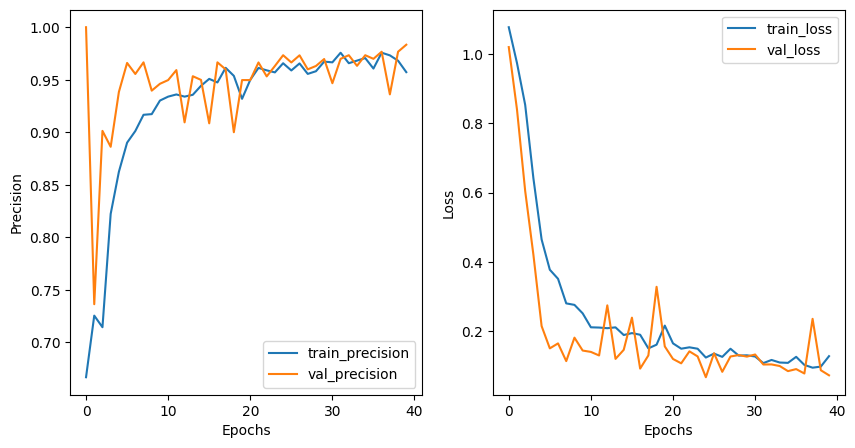

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].plot(train_precision, label='train_precision')
axs[0].plot(validation_precision, label='val_precision')

axs[0].set_ylabel('Precision')
axs[0].set_xlabel('Epochs')

axs[1].plot(train_loss, label='train_loss')
axs[1].plot(validation_loss, label='val_loss')

axs[1].set_ylabel('Loss')
axs[1].set_xlabel('Epochs')

axs[0].legend()
axs[1].legend()

plt.show()

In [ ]:
# load the test set
paper_test = f'{base_path}/paper/test/*'
rock_test = f'{base_path}/rock/test/*'
scissors_test = f'{base_path}/scissors/test/*'

x_paper_test = np.zeros((112, 64, 64), dtype=np.float32)
y_paper_test = np.ones((112), dtype=np.uint8) * 2

x_rock_test = np.zeros((112, 64, 64), dtype=np.float32)
y_rock_test = np.zeros((112), dtype=np.uint8)

x_scissors_test = np.zeros((112, 64, 64), dtype=np.float32)
y_scissors_test = np.ones((112), dtype=np.uint8)

# load paper test set
for i, img_path in enumerate(glob.glob(paper_test)):
  image = np.array(Image.open(img_path), dtype=np.float32)

  # add noise
  std = np.max(image) * 0.05
  noise = np.random.normal(0, std, image.shape).astype(dtype=np.float32)
  image += noise

  x_paper_test[i, :, :] = image


# load rock test set
for i, img_path in enumerate(glob.glob(rock_test)):
  image = np.array(Image.open(img_path), dtype=np.float32)

  # add noise
  std = np.max(image) * 0.05
  noise = np.random.normal(0, std, image.shape).astype(dtype=np.float32)
  image += noise

  x_rock_test[i, :, :] = image

# load scissors test set
for i, img_path in enumerate(glob.glob(scissors_test)):
  image = np.array(Image.open(img_path), dtype=np.float32)

  # add noise
  std = np.max(image) * 0.05
  noise = np.random.normal(0, std, image.shape).astype(dtype=np.float32)
  image += noise

  x_scissors_test[i, :, :] = image


x_test = np.concatenate((x_paper_test, x_rock_test, x_scissors_test))
x_test = np.expand_dims(x_test, axis=3)

y_test = np.concatenate((y_paper_test, y_rock_test, y_scissors_test))

# clear memory
import gc

del x_paper_test, x_rock_test, x_scissors_test
del y_paper_test, y_rock_test, y_scissors_test

gc.collect()

print(f"Test set: x={x_test.shape}, y={y_test.shape}, {np.unique(y_test)}")

Test set: x=(336, 64, 64, 1), y=(336,), [0 1 2]


In [ ]:
# calculate metrics for the test set
from sklearn.metrics import classification_report

# shuffle test set
x_test, y_test = shuffle(x_test, y_test, random_state=0)

# load best model
model = keras.models.load_model('./drive/MyDrive/models/best_model.keras')

x_test_tr = scaler.transform(x_test.reshape((-1, 64**2)))

x_test = x_test_tr.reshape((x_test.shape))

y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

print(classification_report(y_test, y_pred))

11/11 [==============================] - 1s 75ms/step
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       112
           1       0.97      1.00      0.99       112
           2       1.00      0.96      0.98       112

    accuracy                           0.99       336
   macro avg       0.99      0.99      0.99       336
weighted avg       0.99      0.99      0.99       336



# 6. Game with the random agent

### Game time: We perform the gaming part on the test set. First, random flips and are applied (the gaussian noise is already applied during test set loading above). Then the random agent chooses a random label from the test set, while our model predicts an actual picture. For each draw noone gets paid. When someone wins gets back 2 points (and the other looses 1 point).

In [ ]:
# game rounds
rounds = x_test.shape[0]

# # init gain
my_model = []
random_agent = []

my_model_sum = 1
random_agent_sum = 1

for i in range(rounds):
  print(f"============ Iteration: {i} ==================")
  # random number for horizontal flipping
  horizontal = np.random.randint(0, 2)

  # random number for vertical flipping
  vertical = np.random.randint(0, 2)

  # apply transformations
  test_image = scaler.inverse_transform(x_test[i, :, :, :].reshape((-1, 64**2)))
  test_image = test_image.reshape((64, 64))

  image = Image.fromarray(test_image)

  if horizontal==1:
    image = image.transpose(Image.FLIP_LEFT_RIGHT)

  if vertical==1:
    image = image.transpose(Image.FLIP_TOP_BOTTOM)

  # turn image back to numpy
  test_image = np.array(image, dtype=np.float32)

  # scale it again
  test_image_tr = scaler.transform(test_image.reshape((-1, 64**2)))
  test_image = test_image_tr.reshape((1, 64, 64, 1))

  # random agent pick
  y_pred_random = y_test[np.random.randint(0, rounds)]

  # model prediction
  y_pred_model = model.predict(test_image)
  y_pred_model = np.argmax(y_pred_model, axis=1)

  print(f"Random Agent Predicted: {y_pred_random}")
  print()

  print(f"Model Predicted: {y_pred_model}")
  print()

  print(f"True label: {y_test[i]}")
  print()

  if (y_pred_random == y_test[i]) and (y_pred_model == y_test[i]):
    random_agent_sum += 0
    my_model_sum += 0

    random_agent.append(random_agent_sum)
    my_model.append(my_model_sum)
  elif (y_pred_random == y_test[i]) and (y_pred_model != y_test[i]):
    random_agent_sum += 2
    my_model_sum -= 1

    random_agent.append(random_agent_sum)
    my_model.append(my_model_sum)
  elif (y_pred_random != y_test[i]) and (y_pred_model == y_test[i]):
    random_agent_sum -= 1
    my_model_sum += 2

    random_agent.append(random_agent_sum)
    my_model.append(my_model_sum)
  elif (y_pred_random != y_test[i]) and (y_pred_model != y_test[i]):
    random_agent_sum += 0
    my_model_sum += 0

    random_agent.append(random_agent_sum)
    my_model.append(my_model_sum)


============ Iteration: 0 ==================
1/1 [==============================] - 0s 24ms/step
Random Agent Predicted: 1

Model Predicted: [2]

True label: 2

============ Iteration: 1 ==================
1/1 [==============================] - 0s 26ms/step
Random Agent Predicted: 1

Model Predicted: [2]

True label: 2

============ Iteration: 2 ==================
1/1 [==============================] - 0s 25ms/step
Random Agent Predicted: 2

Model Predicted: [1]

True label: 1

============ Iteration: 3 ==================
1/1 [==============================] - 0s 25ms/step
Random Agent Predicted: 0

Model Predicted: [1]

True label: 1

============ Iteration: 4 ==================
1/1 [==============================] - 0s 25ms/step
Random Agent Predicted: 1

Model Predicted: [0]

True label: 0

============ Iteration: 5 ==================
1/1 [==============================] - 0s 23ms/step
Random Agent Predicted: 1

Model Predicted: [1]

True label: 1

============ Iteration: 6 ========

# 7. Game Results

### It can be seen that our model outperforms the random agent.

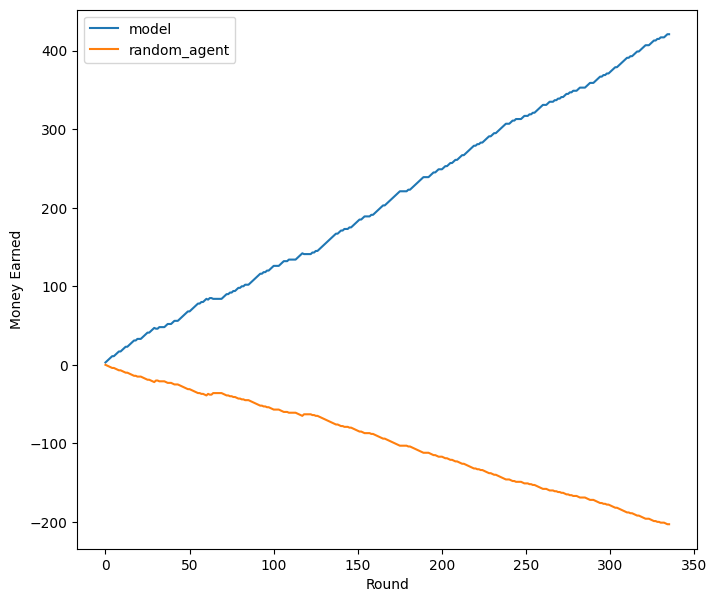

In [ ]:
round = [i for i in range(rounds)]

fig = plt.figure(figsize=(8, 7))

plt.plot(round, my_model, label='model')
plt.plot(round, random_agent, label='random_agent')
plt.xlabel('Round')
plt.ylabel('Money Earned')
plt.legend()
plt.show()

# 8. Results on other images

### Finally we take some pictures with a camera to test out model's performance on data outside the dataset.

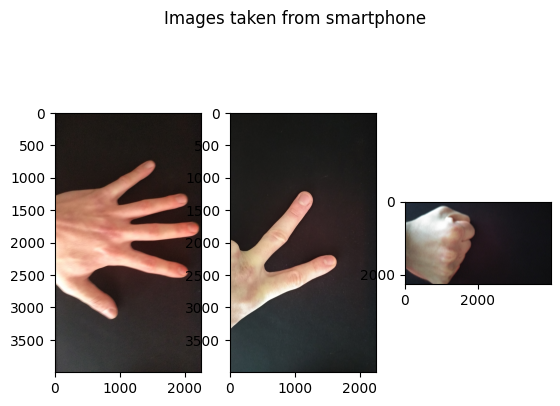

In [ ]:
path_1 = '/content/drive/MyDrive/images/image_1.jpg'
path_2 = '/content/drive/MyDrive/images/image_2.jpg'
path_3 = '/content/drive/MyDrive/images/image_3.jpg'

image_1 = Image.open(path_1)
image_2 = Image.open(path_2)
image_3 = Image.open(path_3)

image_1_gr = ImageOps.grayscale(image_1)
image_1_gr = image_1_gr.resize((64, 64))

image_2_gr = ImageOps.grayscale(image_2)
image_2_gr = image_2_gr.resize((64, 64))

image_3_gr = ImageOps.grayscale(image_3)
image_3_gr = image_3_gr.resize((64, 64))

fig, axs = plt.subplots(1, 3)

axs[0].imshow(image_1)
axs[1].imshow(image_2)
axs[2].imshow(image_3)

plt.suptitle("Images taken from smartphone")
plt.show()

1/1 [==============================] - 0s 25ms/step


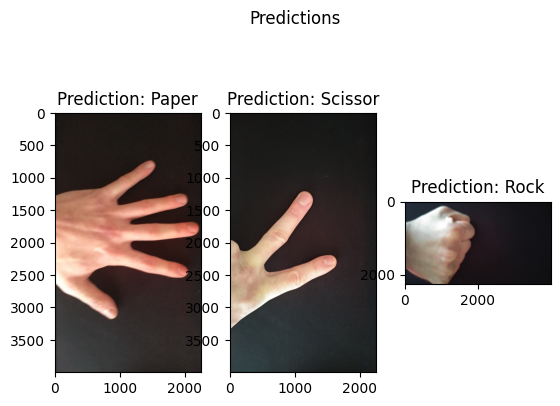

In [ ]:
# scale images
image_1_np = np.array(image_1_gr, dtype=np.float32)
image_2_np = np.array(image_2_gr, dtype=np.float32)
image_3_np = np.array(image_3_gr, dtype=np.float32)

std = np.max(image_1_np) * 0.05
noise = np.random.normal(0, std, image_1_np.shape).astype(dtype=np.float32)
image_1_np += noise

std = np.max(image_2_np) * 0.05
noise = np.random.normal(0, std, image_2_np.shape).astype(dtype=np.float32)
image_2_np += noise

std = np.max(image_2_np) * 0.05
noise = np.random.normal(0, std, image_2_np.shape).astype(dtype=np.float32)
image_2_np += noise

image_1_tr = scaler.transform(image_1_np.reshape((1, 64**2)))
image_2_tr = scaler.transform(image_2_np.reshape((1, 64**2)))
image_3_tr = scaler.transform(image_3_np.reshape((1, 64**2)))

image_1_np = image_1_tr.reshape((1, 64, 64, 1))
image_2_np = image_2_tr.reshape((1, 64, 64, 1))
image_3_np = image_3_tr.reshape((1, 64, 64, 1))

# load model
model = keras.models.load_model('./drive/MyDrive/models/best_model.keras')

y_pred_1 = model.predict(image_1_np)
y_pred_1 = np.argmax(y_pred_1)

y_pred_2 = model.predict(image_2_np)
y_pred_2 = np.argmax(y_pred_2)

y_pred_3 = model.predict(image_3_np)
y_pred_3 = np.argmax(y_pred_3)

labels = ['Rock', 'Scissor', 'Paper']

y_pred_1 = labels[y_pred_1]
y_pred_2 = labels[y_pred_2]
y_pred_3 = labels[y_pred_3]

fig, axs = plt.subplots(1, 3)

axs[0].imshow(image_1)
axs[1].imshow(image_2)
axs[2].imshow(image_3)

axs[0].set_title(f"Prediction: {y_pred_1}")
axs[1].set_title(f"Prediction: {y_pred_2}")
axs[2].set_title(f"Prediction: {y_pred_3}")

plt.suptitle("Predictions")
plt.show()